# **1. Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification



# **2. GitHub Link -**

https://github.com/chandantaksande/Mobile-Price-Prediction-Assement.git

# **3. Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

# **4. Introduction to data**

### 4.1 Importing  Libraries and Dataframe

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Variable to store file path
file_path=r'C:\Users\Zehell\Desktop\data_mobile_price_range.csv'

In [3]:
# Loading dataset
df=pd.read_csv(file_path)

### 4.2 Data Inspection

In [4]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#checking last 5 rows of dataframe
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
# Check Unique Values for each variable.
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [11]:
# Dataset Describe
df.describe([0.25,0.75,0.95,0.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1930.15,1987.00,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.00,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,2.80,3.00,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.00,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,13.00,16.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.00,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,61.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,196.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.00,8.00,8.0


##### 1. From above describe()fuction,  we found that there are four variables "Fc - Front Camera mega pixels", "Pc - Primary Camera mega pixels", "Sc_w - Screen Width of mobile in cm" and "Px_height - Pixel Resolution Width" has zero min value, which are in questions
##### 2. Primary camera and Front camera can be absent if mobile is normal phone.
##### 3. Screen width and pixel height can not be zero

### 4.3 Dataset Features Information

In [12]:
# Dataset columns list
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### 5.3.1 Features Description


#### 1. Battery_power - Total energy a battery can store in one time measured in mAh
#### 2. Blue - Has bluetooth or not
#### 3. Clock_speed - speed at which microprocessor executes instructions
#### 4. Dual_sim - Has dual sim support or not
#### 5. Fc - Front Camera mega pixels
#### 6. Four_g - Has 4G or not
#### 7. Int_memory - Internal Memory in Gigabytes
#### 8. M_dep - Mobile Depth in cm
#### 9. Mobile_wt - Weight of mobile phone
#### 10. N_cores - Number of cores of processor
#### 11. Pc - Primary Camera mega pixels
#### 12. Px_height - Pixel Resolution Height
#### 13. Px_width - Pixel Resolution Width
#### 14. Ram - Random Access Memory in Mega
#### 15. Sc_h - Screen Height of mobile in cm
#### 16. Sc_w - Screen Width of mobile in cm
#### 17. Talk_time - longest time that a single battery charge will last when you are
#### 18. Three_g - Has 3G or not
#### 19. Touch_screen - Has touch screen or not
#### 20. Wifi - Has wifi or not
#### 21. Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2 (High Cost) and 3(very high cost)

# **5. Data Wrangling**

In [13]:
# As discussed earlier Screen width and pixel height can not be zero
#removing rows where 'sc_w' and 'px_height' is zero
df=df.loc[df['sc_w']!=0]

#removing rows where 'px_height' is zero
df=df.loc[df['px_height']!=0]


#new shape of dataframe
df.shape

(1819, 21)

In [14]:
#checking distribution of various price range

counts=df["price_range"].value_counts()

print(counts)

3    461
2    456
1    451
0    451
Name: price_range, dtype: int64


<Figure size 1000x600 with 0 Axes>

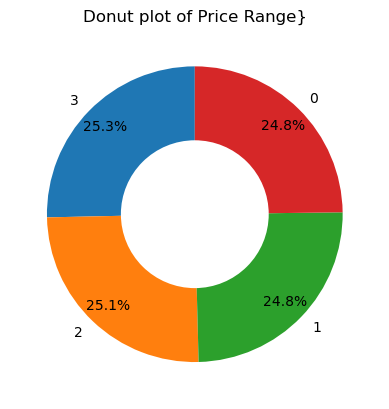

In [15]:
# Create the donut plot to check distribution of 'price_range'
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.add_artist(plt.Circle((0,0), 0.50, fc='white'))

# Add title
ax.set_title("Donut plot of Price Range}")

# Show the plot
plt.show()

# 6. **Data Vizualization& Experimenting with charts**

### 6.1 Univariavte Analysis

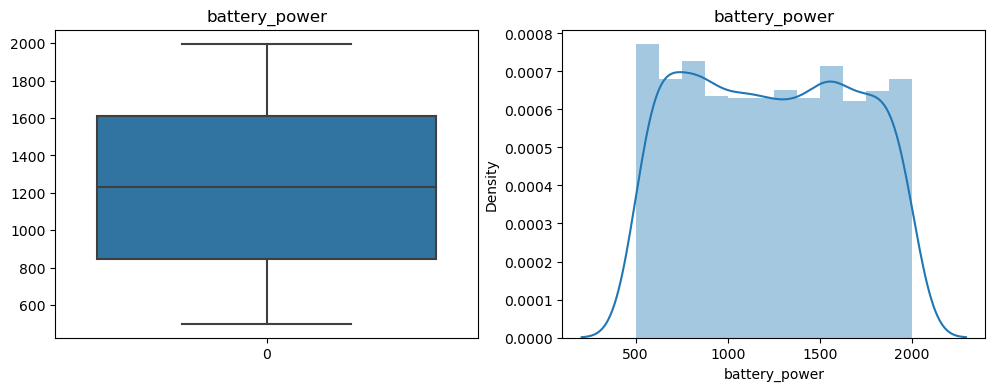

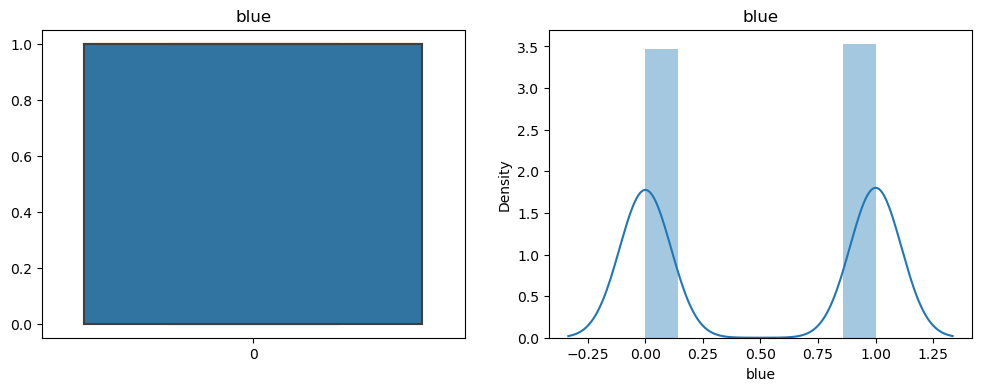

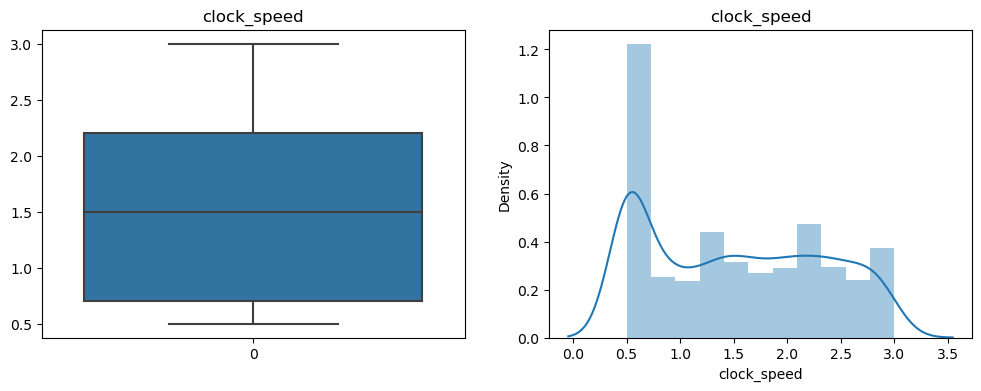

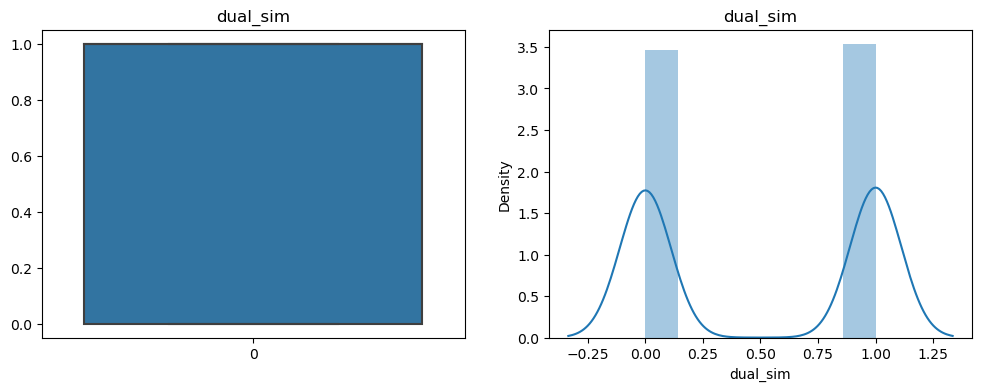

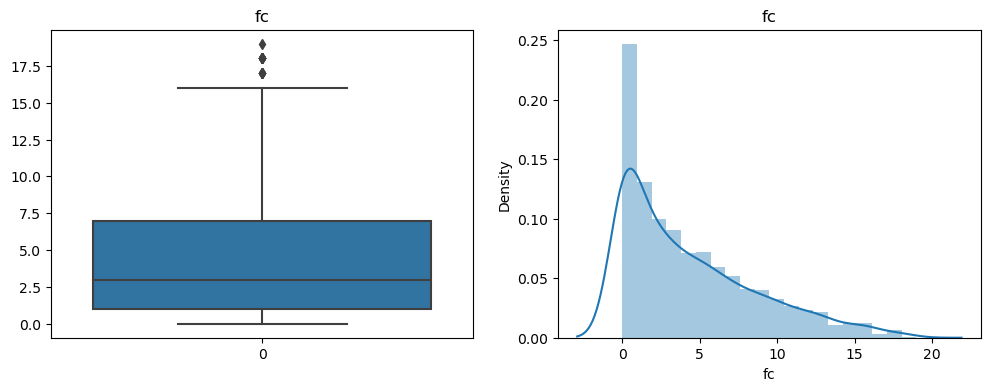

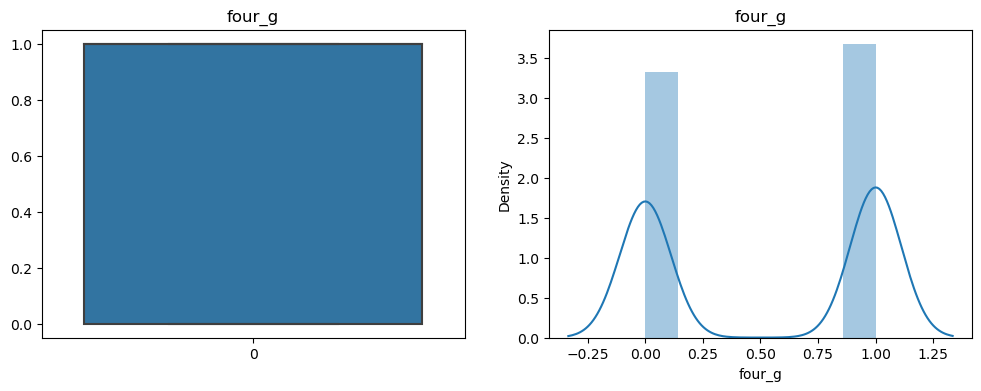

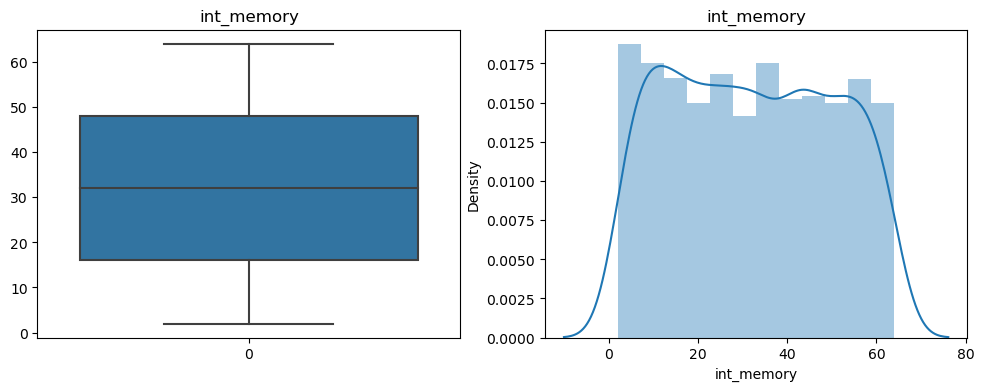

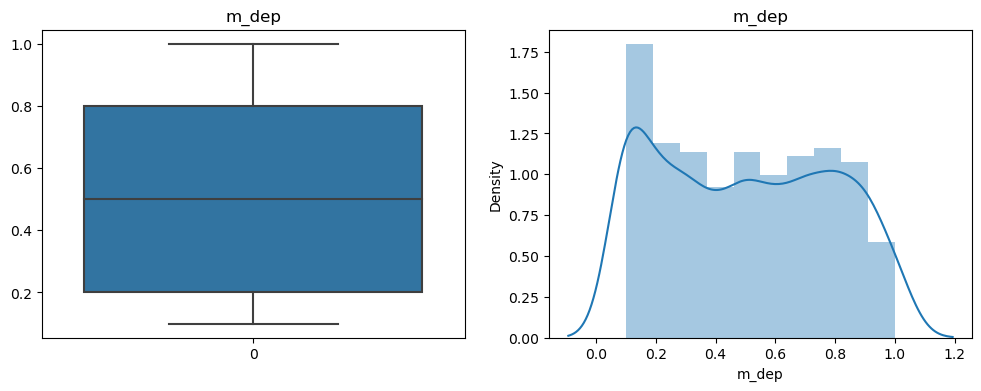

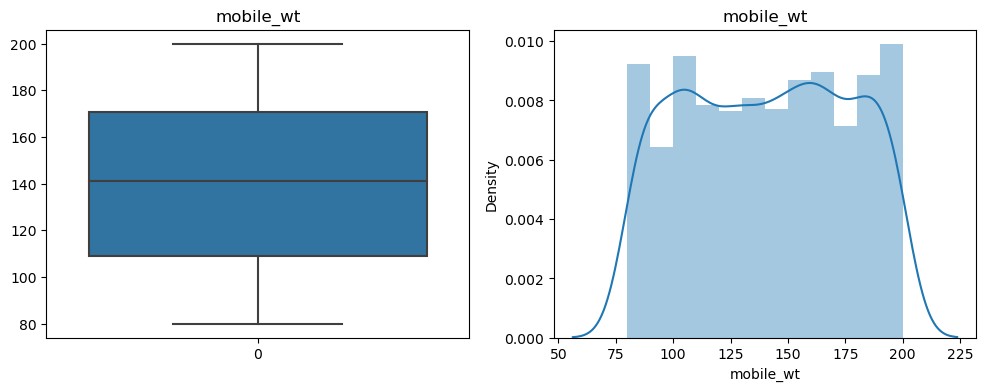

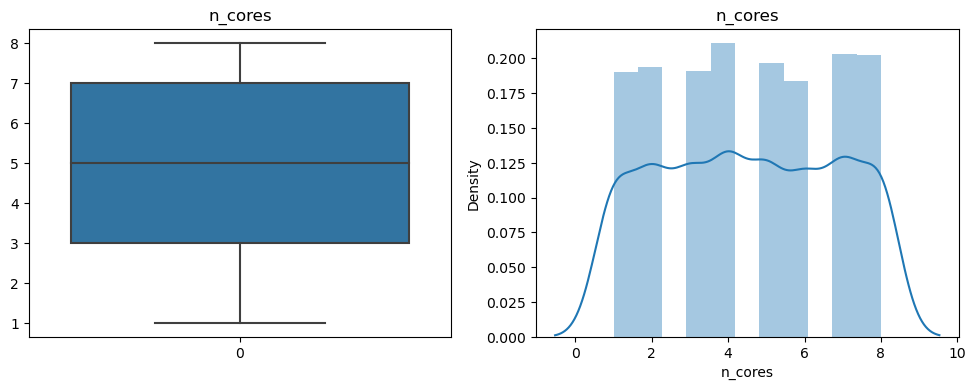

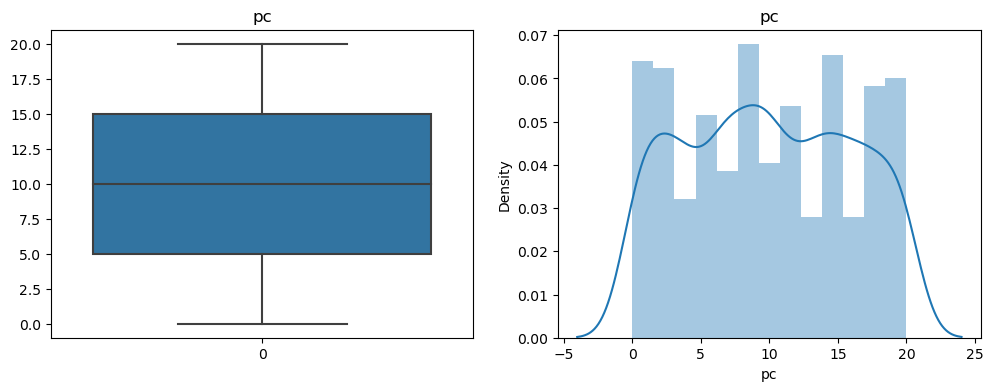

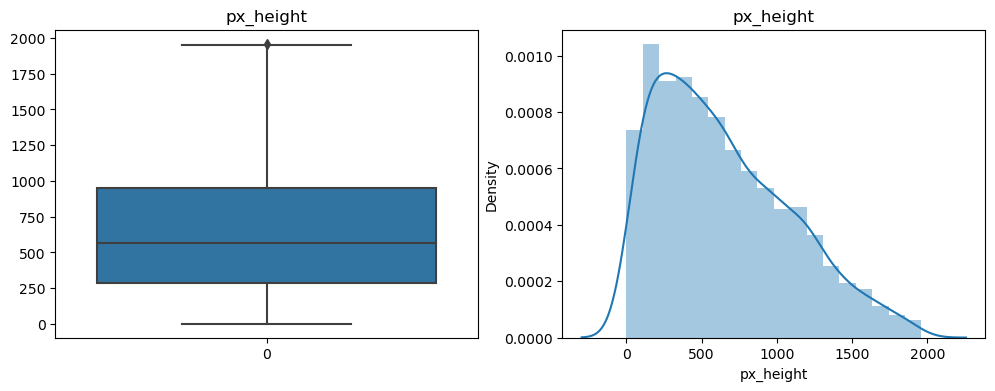

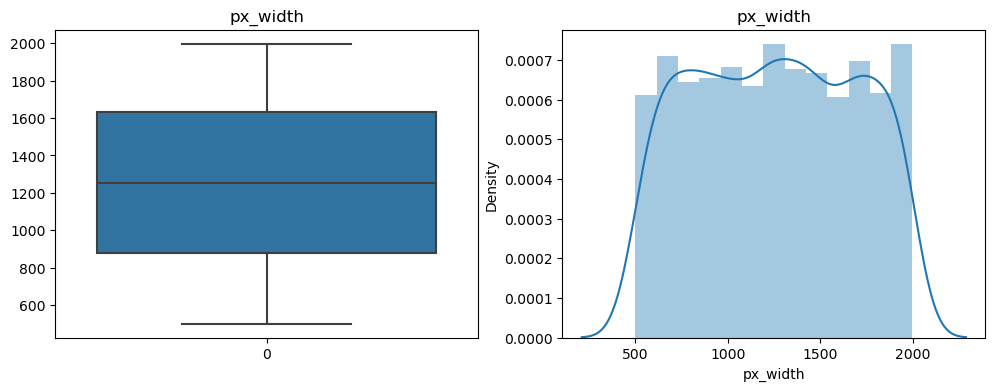

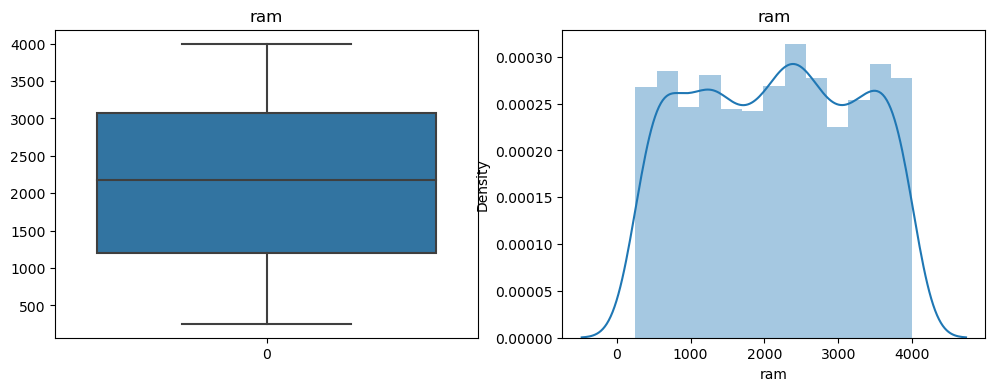

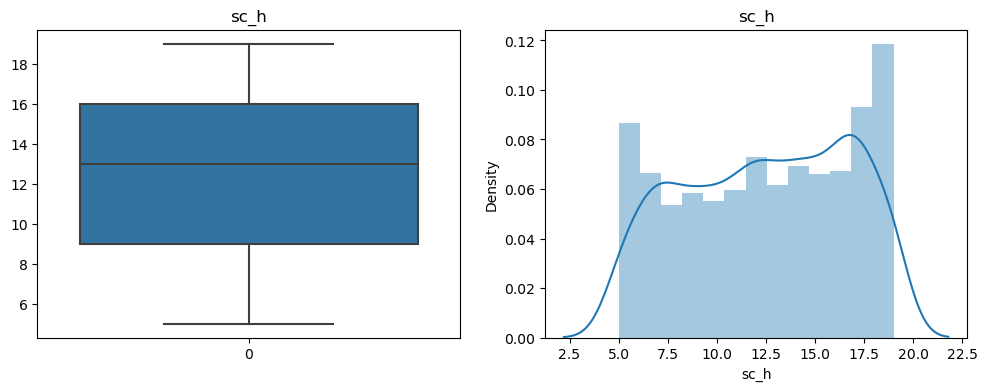

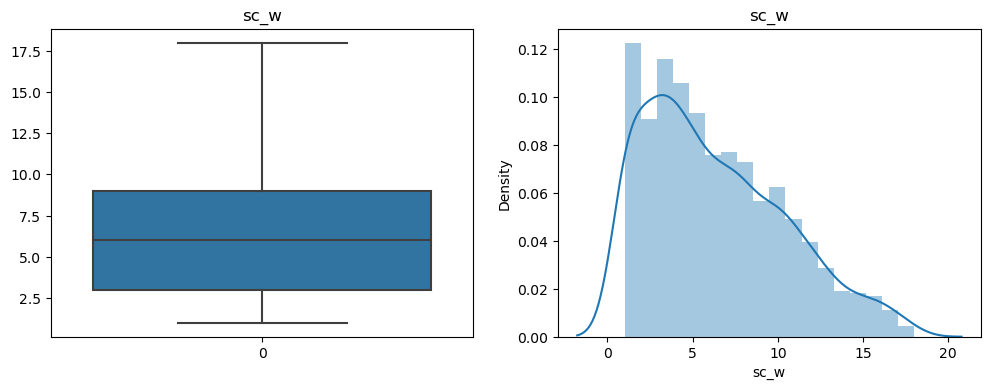

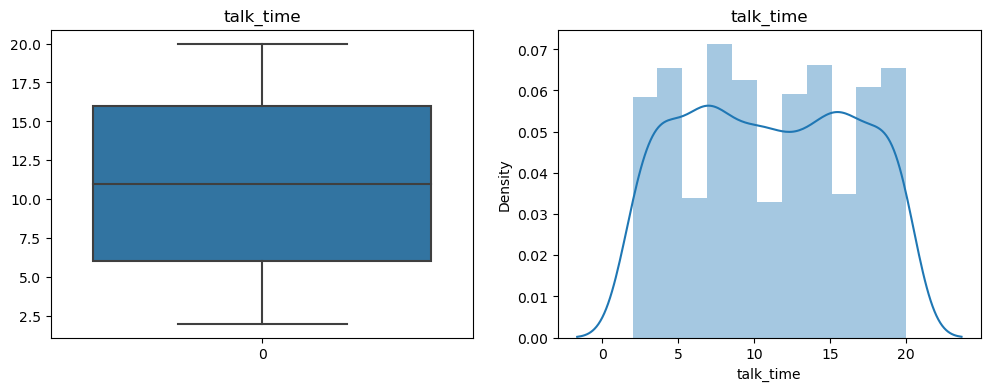

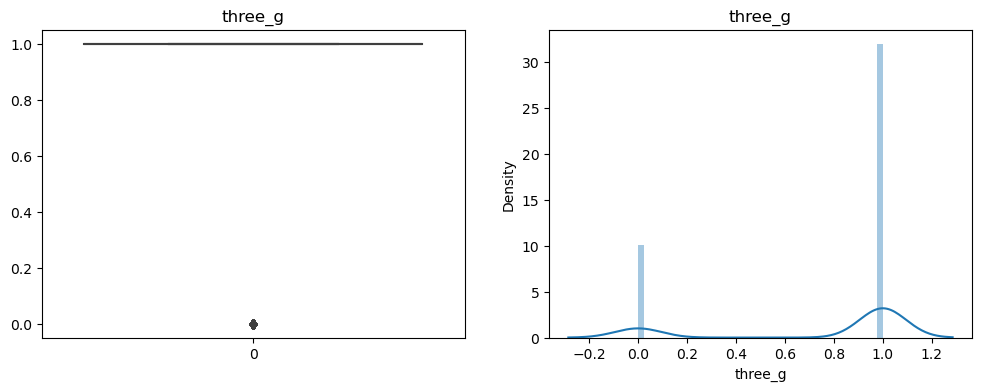

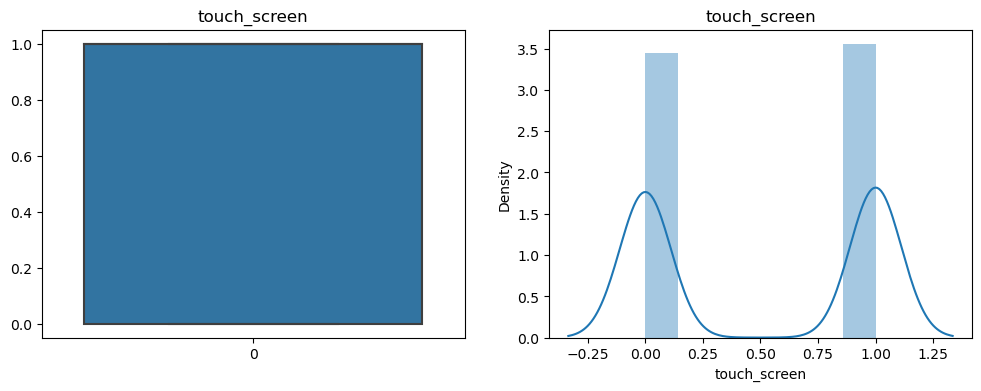

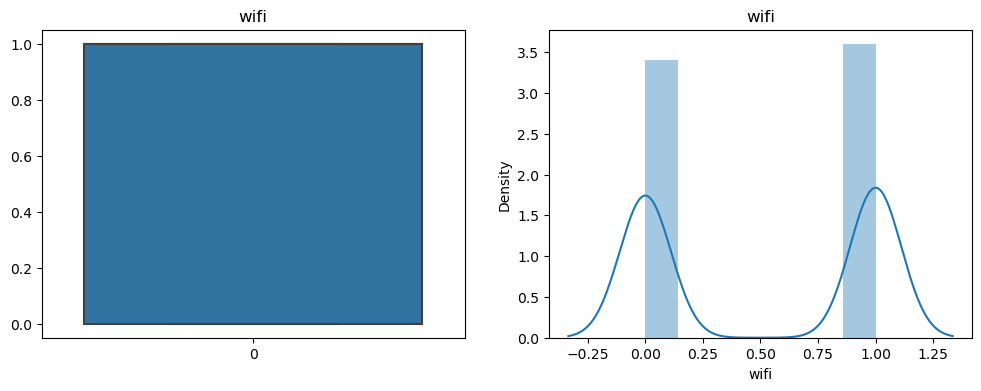

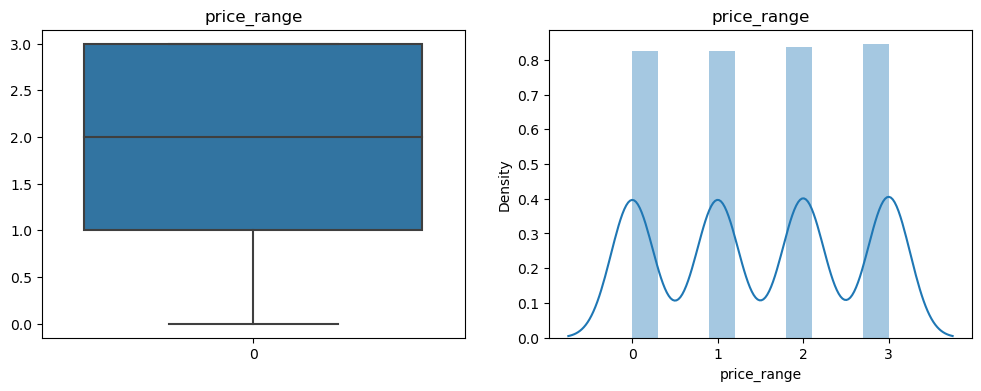

In [16]:
# Perform Univariate Analysis on dataframe
for col in df.columns:
  #poltting boxplot
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(df[col])
    fig.set_title(col)
  #Plotting displot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col])
    fig.set_title(col)
plt.show()

1. From above box plot we find that there are very few features that has outliers
2. From distplot we find that distribution for few features is not normal. We can accept skewness range of -0.5 to 0.5 for good reults. For greater than this range of skewnwss, transformation or Normalization needs to be done.

### 6.2 Bi-variavte Analysis

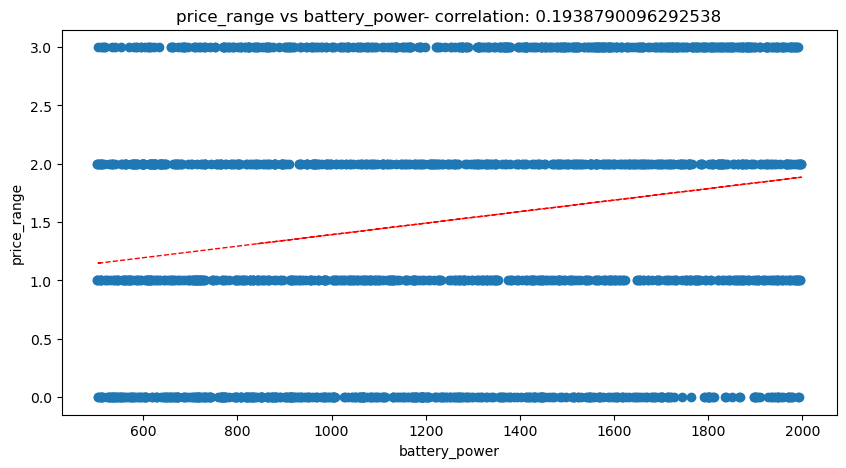

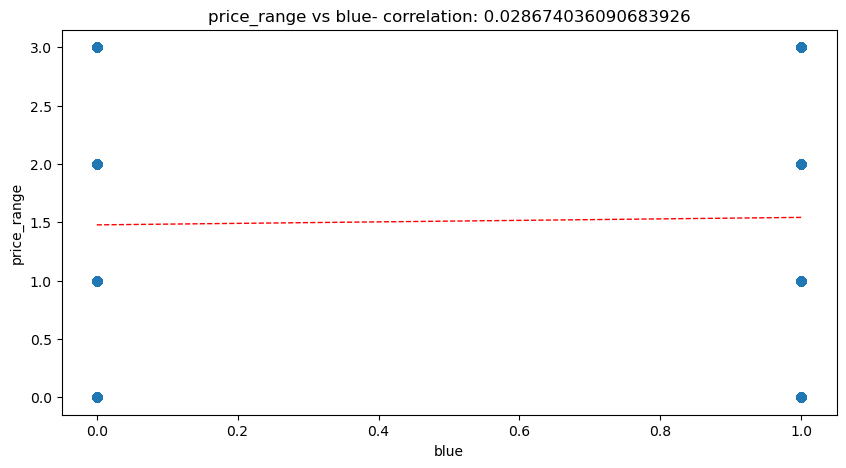

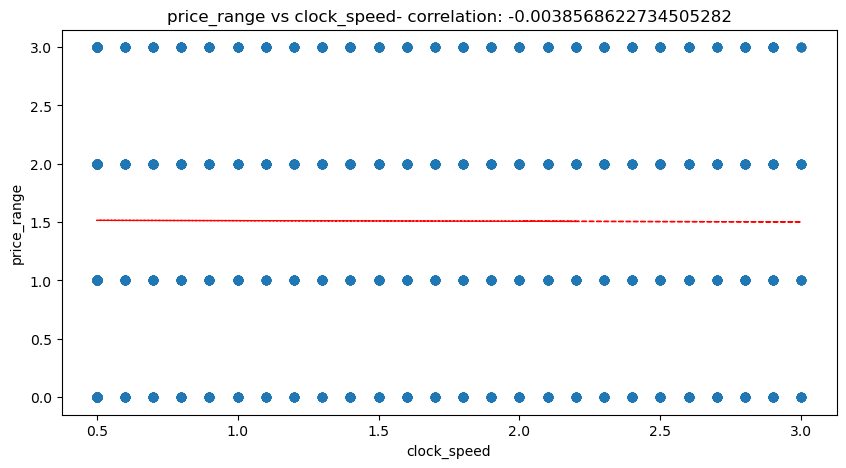

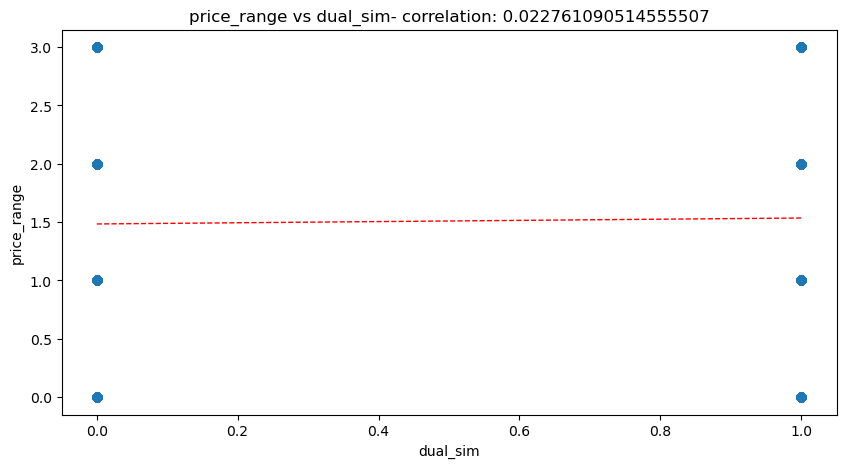

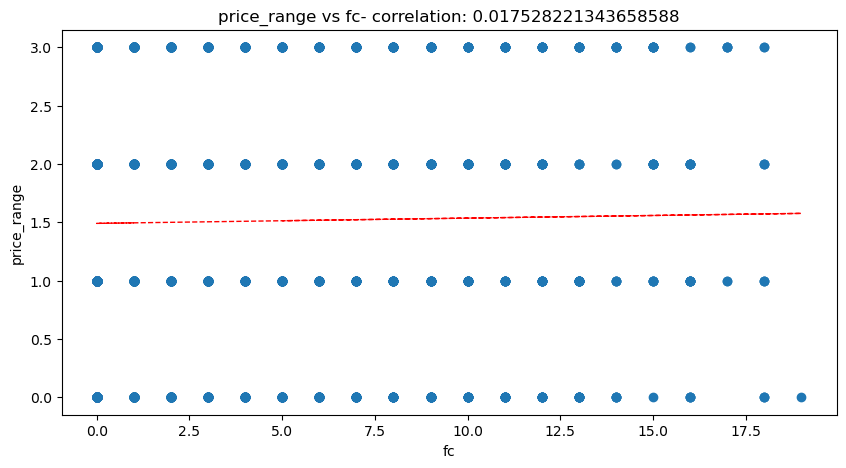

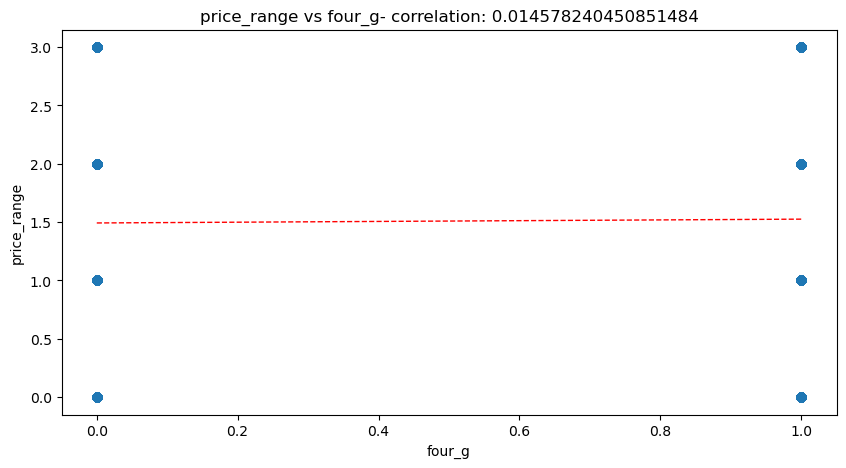

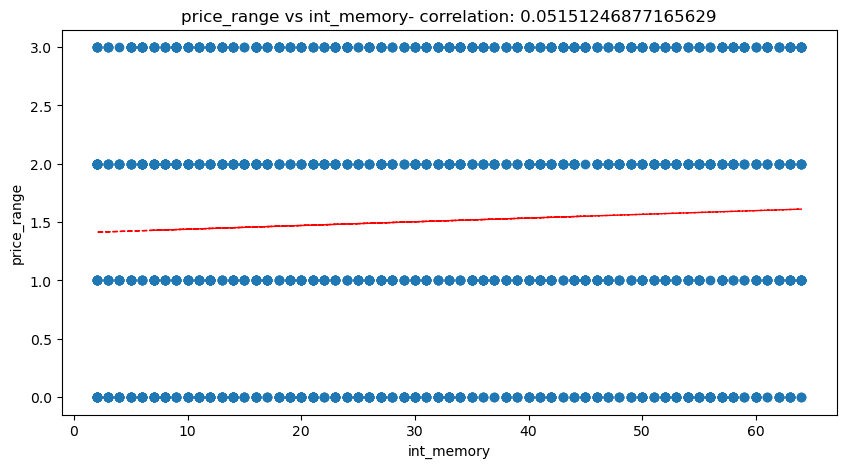

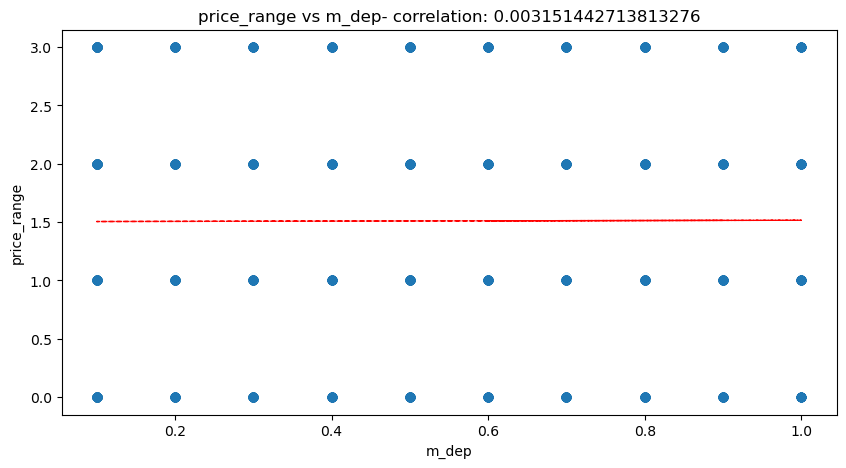

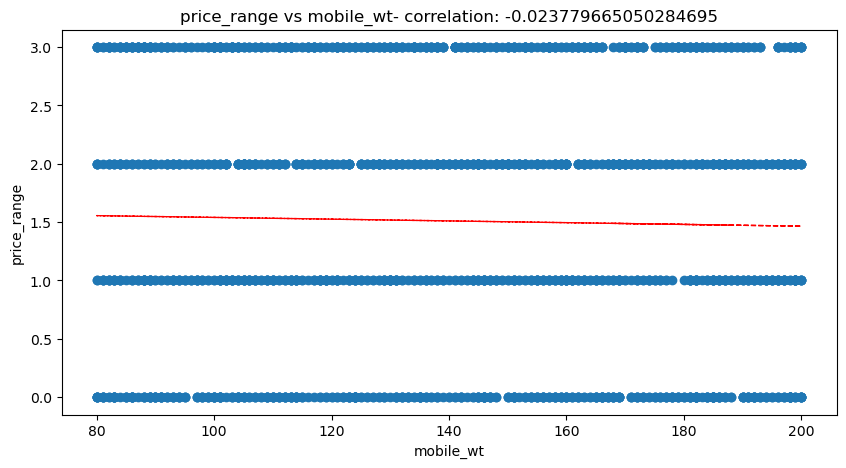

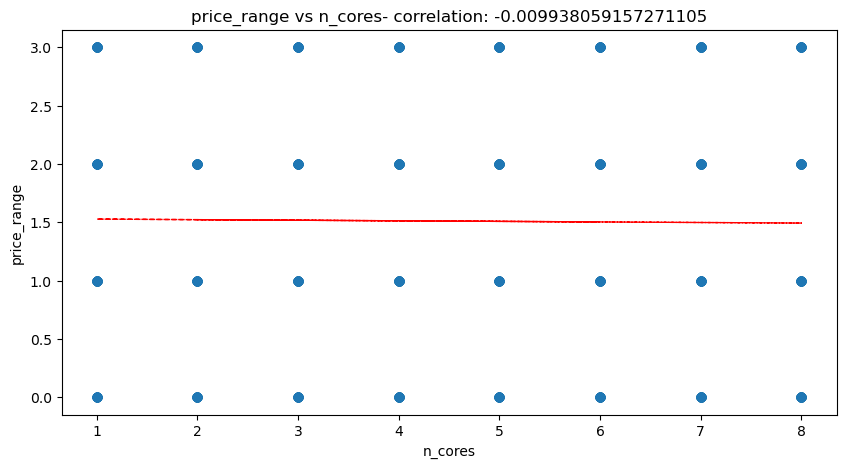

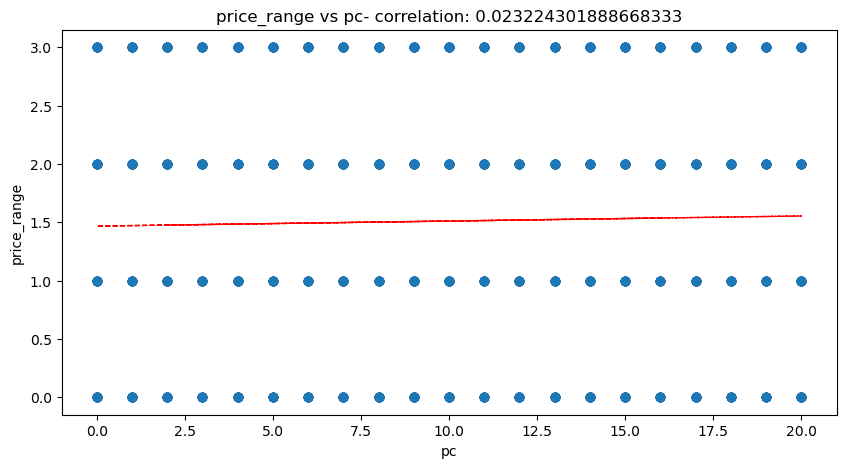

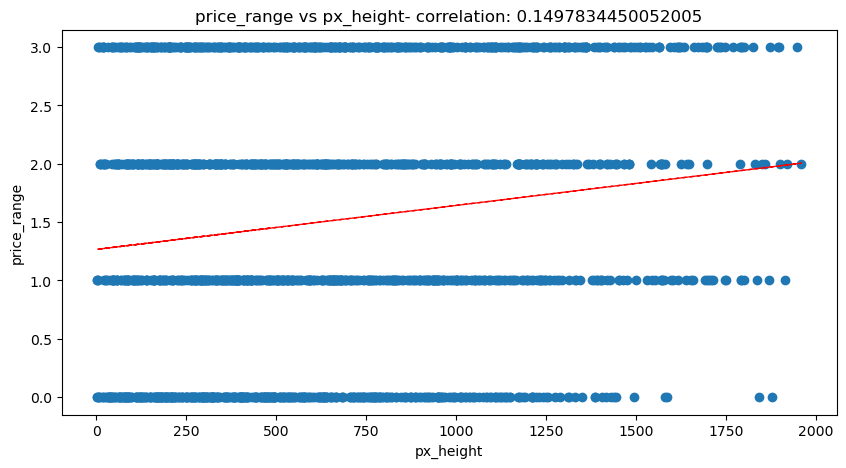

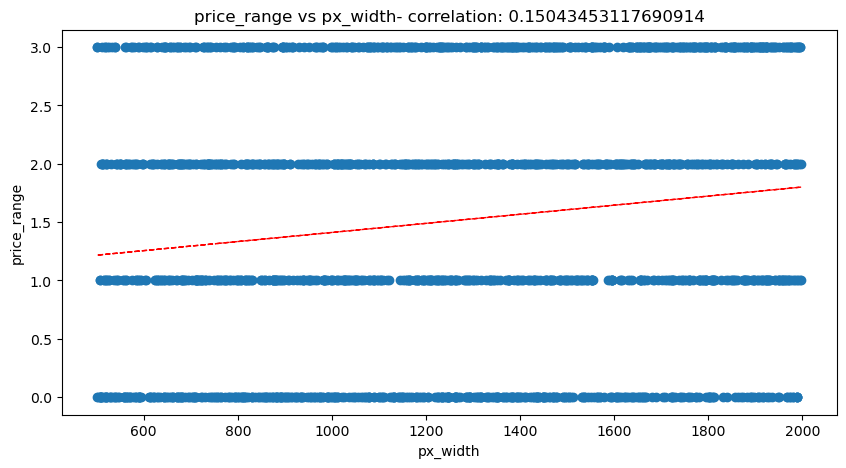

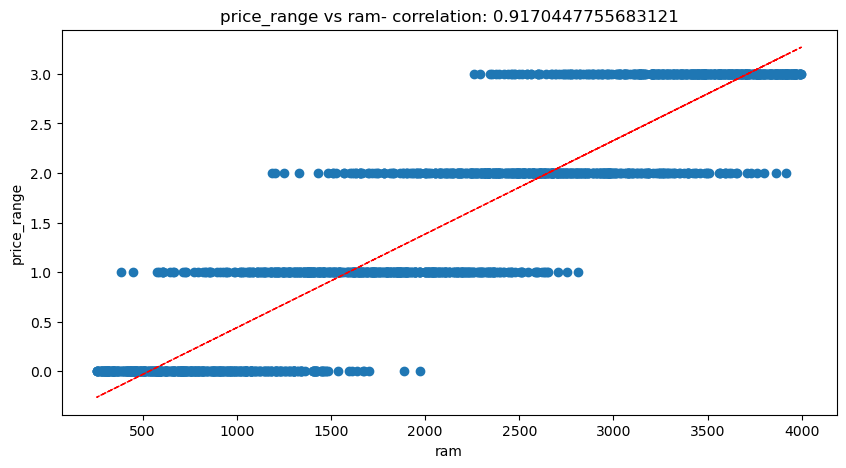

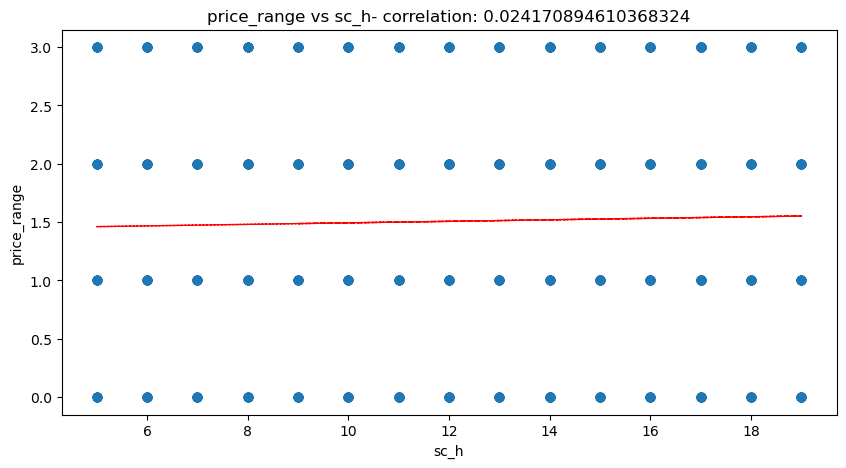

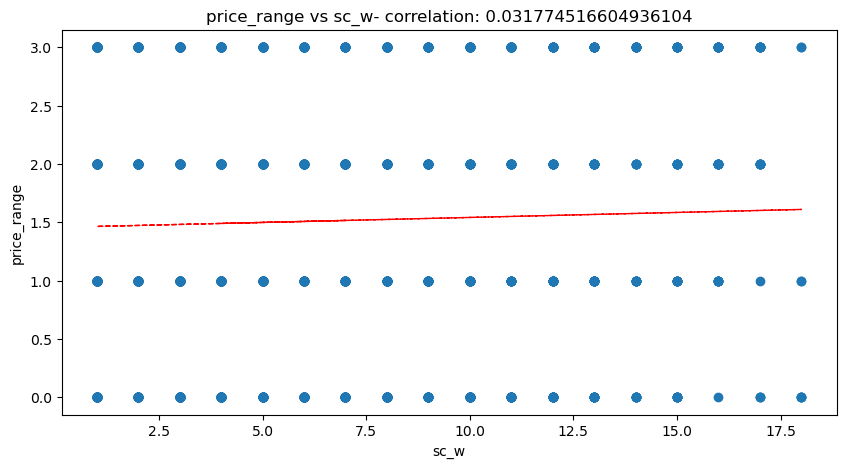

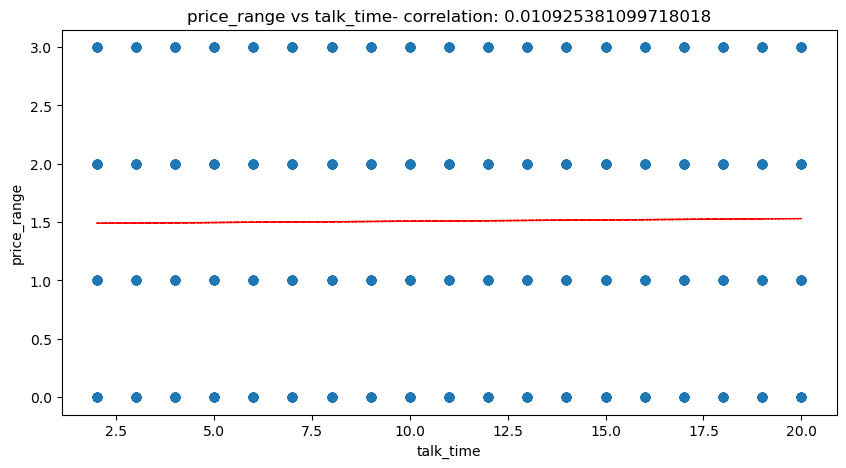

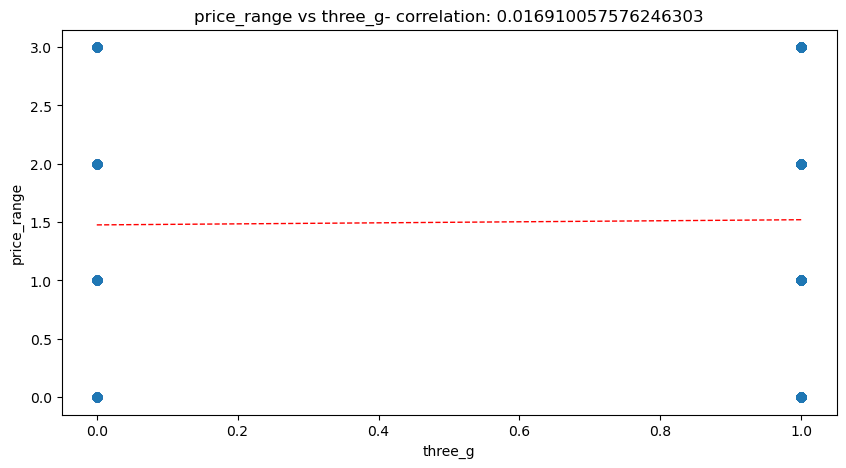

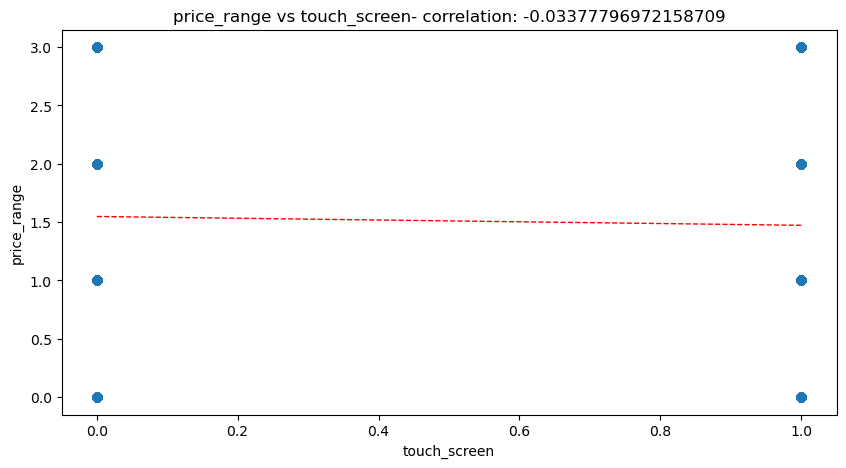

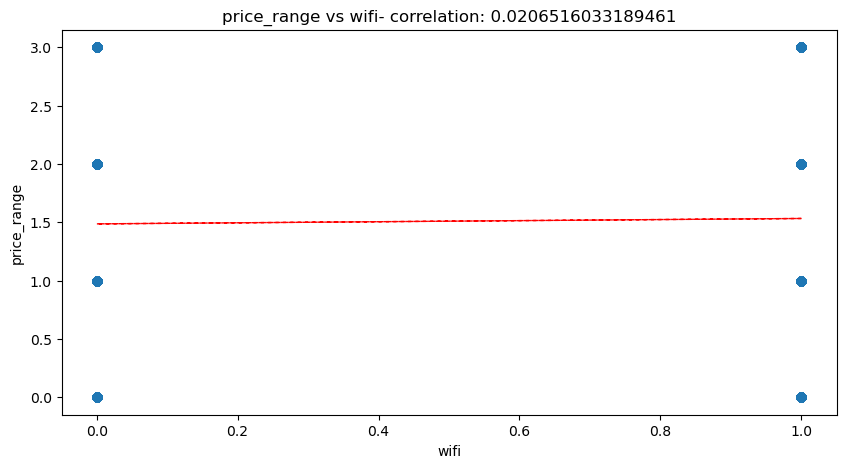

In [17]:
# Cheking Relation Between Dependent and independent variables with correlation for df_avg

for col in df.columns[:-1]:
  fig = plt.figure(figsize=(10,5))
  ax = fig.gca()
  feature = df[col]
  label = df['price_range']

# Correlation Between Features
  correlation = feature.corr(label)

  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('price_range')

#  Nameing Every plot with correlation between variables
  ax.set_title('price_range vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['price_range'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

### 6.3 Multivariate variavte Analysis

<Axes: >

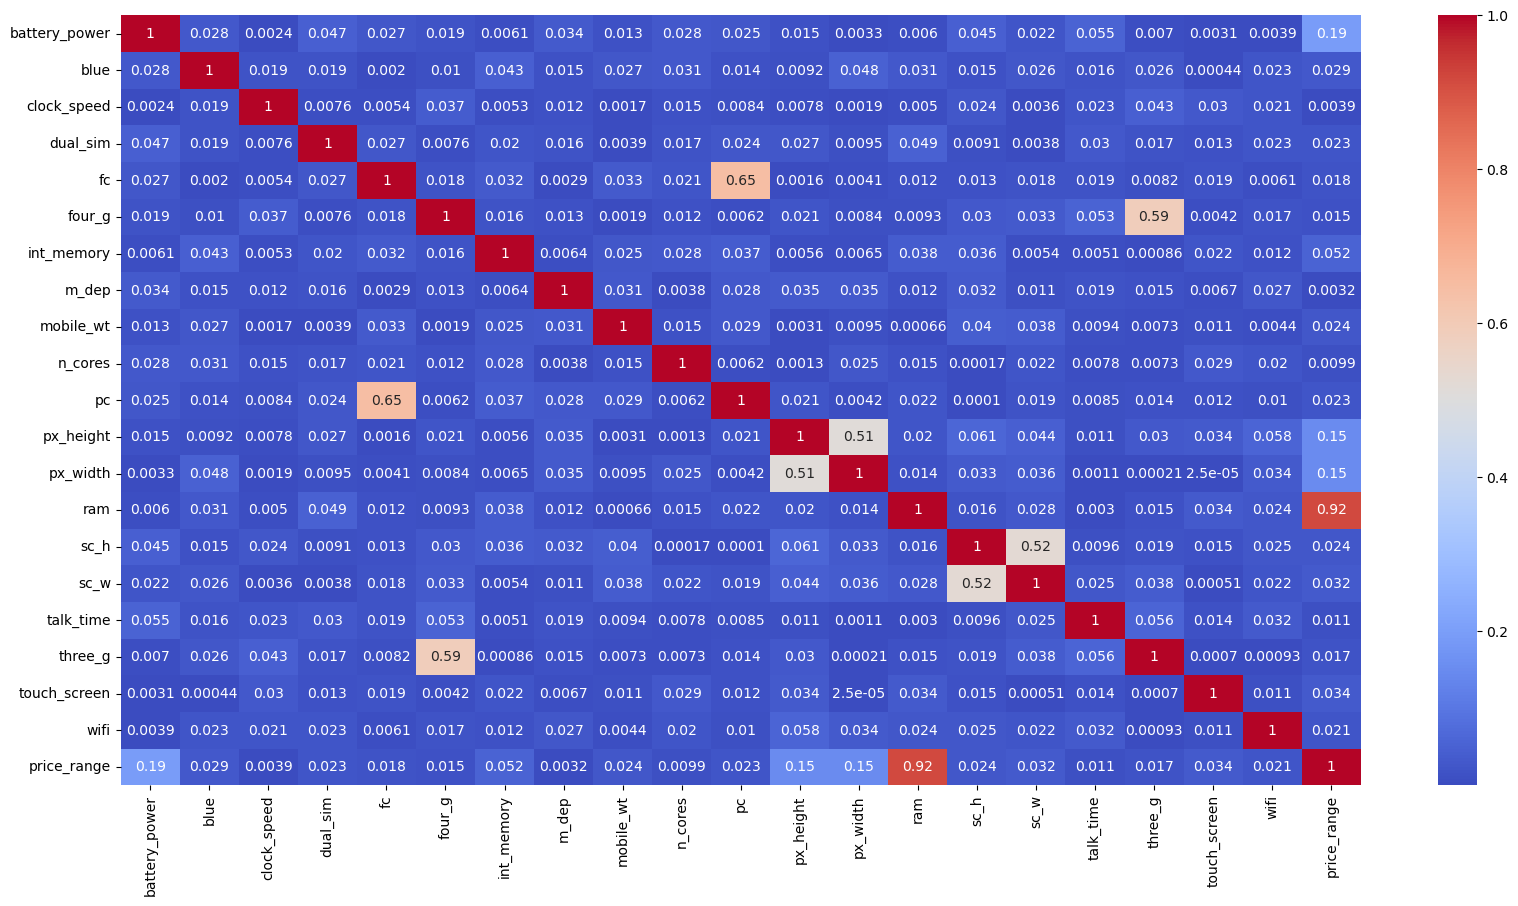

In [18]:
 ## Correlation heatmap
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

1. From above heat map it found that only 'ram' and 'price_range' has high co-relation of 0.92.
2. As we know that higher the ram of mobile ,higher the price of mobile. And we can not drop or concatinate 'ram' feature. As it is one of the most important feature to determine 'price_range'
3. For other features there no high co-relation above 0.6 so, no need for VIF fuction to remove multi-colinarity

# **7. Data Transformtaion**

### 7.1 Transformation

In [19]:
#our data contains zero values.
#so, We used Yeo-Johnson Transformation,that can handle non positive data as well and it is similar to box-cox transformation

pt = PowerTransformer(method='yeo-johnson')

# select all columns except the last one, as this is classification problem and last column can be concome continuous after transformation
cols_to_transform = df.columns[:-1]

#creating transfrom dataframe
df_transform = pd.DataFrame(pt.fit_transform(df[cols_to_transform]), columns=cols_to_transform)

#reseting the index of df dataframe, as there was problem in adding column to transform dataframe
df = df.reset_index(drop=True)

#reseting the index of df_transform dataframe, as there was problem in adding column to transform dataframe
df_transform = df_transform.reset_index(drop=True)

#adding 'price_range' column from df dataframe to df_transform dataframe.
#transforming label column will result in continuous values, which is not acceptable for for classification problem.
df_transform['price_range'] = df['price_range'].astype(int)

#inspecting transfrom dataframe
df_transform.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.879400,-1.007173,0.869527,-1.009390,-0.681840,-1.050186,-1.489742,0.399636,1.315129,-1.107330,...,-2.163190,-1.157768,0.433917,-0.838166,0.363444,1.388550,-1.783707,-1.014955,0.973415,1
1,-0.441031,0.992879,-1.349326,0.990697,-1.384406,0.952212,1.107178,0.723334,-0.100561,-0.624651,...,0.697419,1.621575,0.503076,1.083525,-0.741877,-0.685484,0.560630,0.985265,-1.027311,2
2,-1.628405,0.992879,-1.349326,0.990697,-0.251871,0.952212,0.545462,1.335827,0.151985,0.256010,...,1.268549,1.059578,0.479525,-0.358373,-1.145476,-0.298548,0.560630,0.985265,-1.027311,2
3,-1.481153,0.992879,1.163058,-1.009390,-1.384406,-1.050186,-1.254434,1.035039,-0.242447,0.666470,...,1.199109,1.206256,0.618219,0.842987,0.571783,0.067147,0.560630,-1.014955,-1.027311,2
4,1.280552,0.992879,-0.284121,-1.009390,1.519160,0.952212,0.690213,0.399636,0.040181,-1.107330,...,1.187145,-0.047631,-0.599940,-1.077862,-1.145476,0.751257,0.560630,0.985265,-1.027311,1


### 7.2 Comparision Between Transformed and Original dataframes

**7.2.1 Skewness Comparision**

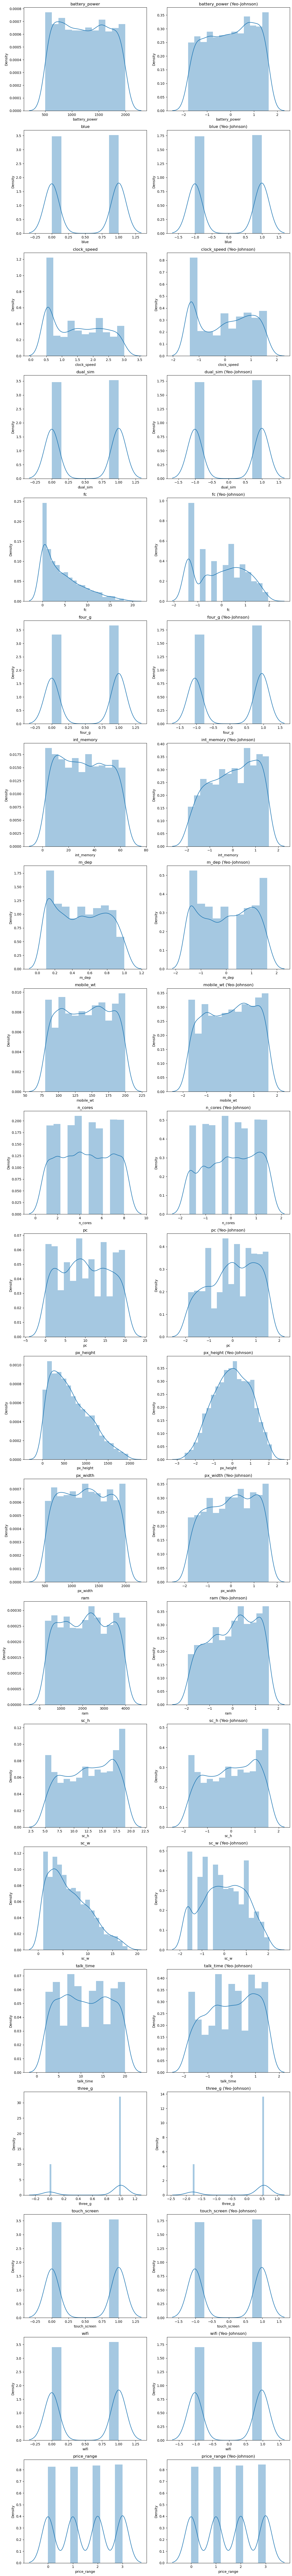

In [20]:
#checking distribution comparision between original and transform dataframe

#dataframe with yeon-johnson transformation
df_transform

# Set up the figure
fig, axes = plt.subplots(len(df.columns), 2, figsize=(12, 5*len(df.columns)))

# Plot the distplots for each column in the original and transformed DataFrames
for i, col in enumerate(df_transform.columns):
    sns.distplot(df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col}')

    sns.distplot(df_transform[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} (Yeo-Johnson)')

plt.tight_layout()
plt.show()

In [21]:
#creating dataframe to store skewness of original and transform dataframe
skewness_of_df = pd.DataFrame({'Original': df.skew(), 'Yeo-Johnson': df_transform.skew()})
# Display the resulting table
print("Skewness for df dataframe")
print(skewness_of_df)

Skewness for df dataframe
               Original  Yeo-Johnson
battery_power  0.030214    -0.109607
blue          -0.014306    -0.014306
clock_speed    0.179361    -0.042548
dual_sim      -0.018708    -0.018708
fc             1.031348    -0.031070
four_g        -0.098054    -0.098054
int_memory     0.057134    -0.205145
m_dep          0.099780    -0.030696
mobile_wt     -0.015648    -0.083390
n_cores       -0.006628    -0.146803
pc             0.028360    -0.228421
px_height      0.670187    -0.109946
px_width       0.004269    -0.112141
ram           -0.006716    -0.203381
sc_h          -0.141910    -0.139571
sc_w           0.654212    -0.051869
talk_time      0.014578    -0.159681
three_g       -1.224086    -1.224086
touch_screen  -0.029714    -0.029714
wifi          -0.053940    -0.053940
price_range   -0.012319    -0.012319


From above table we can see that after transformation skewness of data frame has been improved in fc, px_height and sc_w. These features had very high skewness before transformation

**7.3.2 Outliers Comparision**

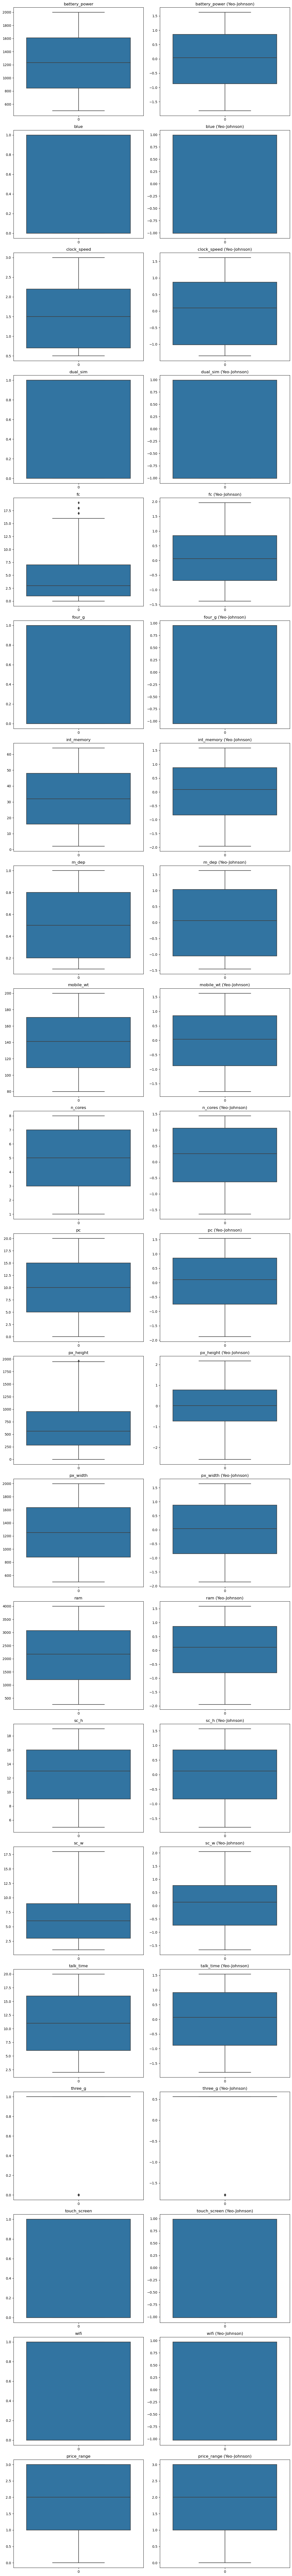

In [22]:
#checking boxplot comparision between original and transform dataframe

#dataframe with yeon-johnson transformation
df_transform

# Set up the figure
fig, axes = plt.subplots(len(df.columns), 2, figsize=(12, 5*len(df.columns)))

# Plot the distplots for each column in the original and transformed DataFrames
for i, col in enumerate(df_transform.columns):
    sns.boxplot(df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col}')

    sns.boxplot(df_transform[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} (Yeo-Johnson)')

plt.tight_layout()
plt.show()

From above box plot we can see that outliers in px_height and fc has been removes.

## **8. ML Model Implementation**

#### 8.1 ML Model Implementation

In [23]:
def test_classification_models(df, df_name):
    # Define X and y for the dataframe
    variable = "price_range"
    X = df.iloc[:, df.columns!=variable]
    y = df['price_range']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Define the models
    models = [
        ("Logistic Regression", LogisticRegression(multi_class='ovr')),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("SVM", SVC(decision_function_shape='ovr')),
        ("Naive Bayes", GaussianNB()),
        ("K-Nearest Neighbors", KNeighborsClassifier()),
    ]
    results = []

    # Train and test each model
    for name, model in models:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')

        # It will check if the classifier supports probability estimates using the hasattr (has attribute) function.
        # If the classifier does not support probability estimates, it will set the AUC score to 0.0.
        # It is used for SVM as it does not have predict_proba
        if hasattr(model, "predict_proba"):
            auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')
        else:
            auc = 0.0
        # Append the results to the list
        results.append((name, acc, prec, rec, auc))

    # Create a pandas DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'ROC AUC'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name

    # Return the results dataframe
    return df_results


In [24]:
# Combine results for all dataframes
df_list = [df, df_transform]
results_list = [test_classification_models(df, df_name) for df, df_name in zip(df_list, ["df","df_transform"])]
results_df = pd.concat(results_list, ignore_index=True)

# Print the combined results dataframe
results_df

,Model,Accuracy,Precision,Recall,ROC AUC,Dataframe
0,Logistic Regression,0.662088,0.642267,0.662088,0.870330,df
1,Decision Tree,0.848901,0.847587,0.848901,0.898525,df
2,Random Forest,0.857143,0.857979,0.857143,0.974761,df
3,SVM,0.934066,0.934107,0.934066,0.000000,df
4,Naive Bayes,0.788462,0.792219,0.788462,0.942151,df
5,K-Nearest Neighbors,0.923077,0.924156,0.923077,0.987565,df
6,Logistic Regression,0.802198,0.796579,0.802198,0.940248,df_transform
7,Decision Tree,0.835165,0.835311,0.835165,0.889090,df_transform
8,Random Forest,0.854396,0.859509,0.854396,0.975652,df_transform
9,SVM,0.857143,0.860124,0.857143,0.000000,df_transform


#### 8.2 Cross- Validation & Hyperparameter Tuning

In [25]:
def test_classification_models_with_cv(df, df_name):
    # Define X and y for the dataframe
    variable = "price_range"
    X = df.iloc[:, df.columns!=variable]
    y = df['price_range']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Define the models with their hyperparameters
    lists_of_models = [("Logistic Regression", LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)),("Decision Tree", DecisionTreeClassifier()),("Random Forest", RandomForestClassifier()),("SVM", SVC(decision_function_shape='ovr', kernel='rbf')),("Naive Bayes", GaussianNB()),("K-Nearest Neighbors", KNeighborsClassifier())]

    results = []

    # Train and test each model with cross-validation
    for name, model in lists_of_models:
        # Define the parameter grid for the model
        param_grid = {}
        if name == "Logistic Regression":
            param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
        elif name == "Decision Tree":
            param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'min_samples_split': [2, 5, 10]}
        elif name == "Random Forest":
            param_grid = {'n_estimators': [100, 500, 1000], 'max_depth': [ 10, 50, 100], 'min_samples_split': [2, 5, 10]}
        elif name == "SVM":
            param_grid = {'C': [0.1,0.5, 1,5,10]}
        elif name == "K-Nearest Neighbors":
            param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform', 'distance']}

        # Perform GridSearchCV to find the best hyperparameters for the model
        cv_model = GridSearchCV(model, param_grid, cv=5)
        cv_model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = cv_model.predict(X_test)

        # Calculate evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')

        # It will check if the classifier supports probability estimates using the hasattr function.
        # If the classifier does not support probability estimates, it will set the AUC score to 0.0.
        # It is used for SVM as it does not have predict_proba
        if hasattr(cv_model, "predict_proba"):
            auc = roc_auc_score(y_test, cv_model.predict_proba(X_test), multi_class='ovr', average='weighted')
        else:
            auc = 0.0
        # Append the results to the list
        results.append((name, acc, prec, rec, auc))


    # Create a pandas DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'ROC AUC'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name

    # Return the results dataframe
    return df_results


In [26]:
# Combine results for all dataframes
df_list = [df, df_transform]
cv_results_list = [test_classification_models_with_cv(df, df_name) for df, df_name in zip(df_list, ["df","df_transform"])]
cv_results_df = pd.concat(cv_results_list, ignore_index=True)

# Print the combined results dataframe
cv_results_df

,Model,Accuracy,Precision,Recall,ROC AUC,Dataframe
0,Logistic Regression,0.840659,0.844253,0.840659,0.958232,df
1,Decision Tree,0.873626,0.876106,0.873626,0.944585,df
2,Random Forest,0.873626,0.877111,0.873626,0.977445,df
3,SVM,0.953297,0.955085,0.953297,0.000000,df
4,Naive Bayes,0.788462,0.792219,0.788462,0.942151,df
5,K-Nearest Neighbors,0.928571,0.931167,0.928571,0.992427,df
6,Logistic Regression,0.826923,0.827576,0.826923,0.947428,df_transform
7,Decision Tree,0.865385,0.867027,0.865385,0.940486,df_transform
8,Random Forest,0.873626,0.877243,0.873626,0.978419,df_transform
9,SVM,0.868132,0.870123,0.868132,0.000000,df_transform


In [27]:
#adding a string in "Model" column
cv_results_df["Model"]=cv_results_df["Model"]+" With Cross Validation and Hypertunning"

#inspecting dataframe
cv_results_df

,Model,Accuracy,Precision,Recall,ROC AUC,Dataframe
0,Logistic Regression With Cross Validation and ...,0.840659,0.844253,0.840659,0.958232,df
1,Decision Tree With Cross Validation and Hypert...,0.873626,0.876106,0.873626,0.944585,df
2,Random Forest With Cross Validation and Hypert...,0.873626,0.877111,0.873626,0.977445,df
3,SVM With Cross Validation and Hypertunning,0.953297,0.955085,0.953297,0.000000,df
4,Naive Bayes With Cross Validation and Hypertun...,0.788462,0.792219,0.788462,0.942151,df
5,K-Nearest Neighbors With Cross Validation and ...,0.928571,0.931167,0.928571,0.992427,df
6,Logistic Regression With Cross Validation and ...,0.826923,0.827576,0.826923,0.947428,df_transform
7,Decision Tree With Cross Validation and Hypert...,0.865385,0.867027,0.865385,0.940486,df_transform
8,Random Forest With Cross Validation and Hypert...,0.873626,0.877243,0.873626,0.978419,df_transform
9,SVM With Cross Validation and Hypertunning,0.868132,0.870123,0.868132,0.000000,df_transform


In [28]:
#creating combined dataframe from both resulted dataframes
combined_mixed_df=pd.concat([results_df,cv_results_df])

#sorting dataframe from highest to lowest accuracy
combined_mixed_df=combined_mixed_df.sort_values('Accuracy',ascending=False)

#finding best accurate dataframe
best_accurate_dataframe=combined_mixed_df['Dataframe'].iloc[0]

#finding best model
best_accurate_model=combined_mixed_df['Model'].iloc[0]

#Accuracy
accuracy=combined_mixed_df['Accuracy'].iloc[0]

#Precision
precision=combined_mixed_df['Precision'].iloc[0]

#Recall
recall=combined_mixed_df['Recall'].iloc[0]

#final conclusion
print(f'{best_accurate_model} model has given highest accuracy for  {best_accurate_dataframe } dataframe with accuracy: {accuracy}, precision: {precision} and recall score of {recall}')




SVM With Cross Validation and Hypertunning model has given highest accuracy for  df dataframe with accuracy: 0.9532967032967034, precision: 0.9550849010709608 and recall score of 0.9532967032967034


# **8. Conclusion**

In [29]:
#conclusion
print(f'{best_accurate_model} model has given highest accuracy for  {best_accurate_dataframe } dataframe with accuracy: {accuracy}, precision: {precision} and recall score of {recall}')

SVM With Cross Validation and Hypertunning model has given highest accuracy for  df dataframe with accuracy: 0.9532967032967034, precision: 0.9550849010709608 and recall score of 0.9532967032967034
